# Lista 1


### Implementing Planck’s Function

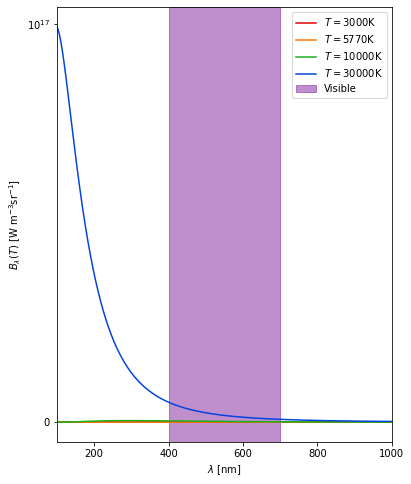

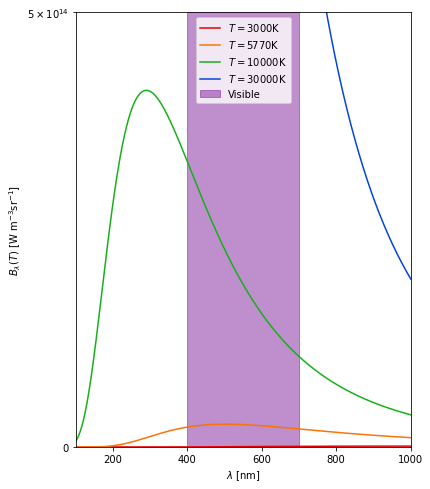

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

h=6.626e-34
c=2.998e8
k=1.381e-23

def planckiana(lam, T):
    return ((2*h*(c**2))/(lam**5))/(np.exp((h*c)/(lam*k*T))-1)

lam_int=np.arange(100e-9, 3000e-9, 1e-9)

g1=plt.figure(figsize=(6,8))
plt.plot(lam_int, planckiana(lam_int, 3000), color='xkcd:red', label=r'$T=3000$K')
plt.plot(lam_int, planckiana(lam_int, 5770), color='xkcd:orange', label=r'$T=5770$K')
plt.plot(lam_int, planckiana(lam_int, 10000), color='xkcd:green', label=r'$T=10000$K')
plt.plot(lam_int, planckiana(lam_int, 30000), color='xkcd:blue', label=r'$T=30000$K')
plt.xlim([100e-9, 1000e-9])
plt.axvspan(400e-9, 700e-9, color='xkcd:purple', alpha=0.5, label='Visible')
plt.ylabel(r"$B_\lambda(T)$ [W m$^{-3}$sr$^{-1}$]")
plt.xlabel(r"$\lambda$ [nm]")
plt.xticks([0.2e-6, 0.4e-6, 0.6e-6, 0.8e-6, 1e-6], ['200', '400', '600', '800', '1000'])
plt.yticks([0.001e17, 1e17], ['0', r'$10^{17}$'])
plt.legend()

g2=plt.figure(figsize=(6,8))
plt.plot(lam_int, planckiana(lam_int, 3000), color='xkcd:red', label=r'$T=3000$K')
plt.plot(lam_int, planckiana(lam_int, 5770), color='xkcd:orange', label=r'$T=5770$K')
plt.plot(lam_int, planckiana(lam_int, 10000), color='xkcd:green', label=r'$T=10000$K')
plt.plot(lam_int, planckiana(lam_int, 30000), color='xkcd:blue', label=r'$T=30000$K')
plt.xlim([100e-9, 400e-9])
plt.ylim([0.001e8, 0.5e15])
plt.axvspan(400e-9, 700e-9, color='xkcd:purple', alpha=0.5, label='Visible')
plt.ylabel(r"$B_\lambda(T)$ [W m$^{-3}$sr$^{-1}$]")
plt.xlabel(r"$\lambda$ [nm]")
plt.xticks([0.2e-6, 0.4e-6, 0.6e-6, 0.8e-6, 1e-6], ['200', '400', '600', '800', '1000'])
plt.yticks([0, 0.5e15], ['0',r'$5\times10^{14}$'])
plt.legend()

### Analysis of Blackbody Spectra

In [85]:
lam_max=[]
temps=np.array([3000, 5770, 10000, 30000])
b=2.898e-3
wien=b/temps
for i in temps:
    index_max=np.argmax(planckiana(lam_int, i))
    lam_max.append(float(lam_int[index_max]))

wien= [ '%.2e' % elem for elem in wien]
lam_max= [ '%.2e' % elem for elem in lam_max]
print(wien)
print(lam_max)

['9.66e-07', '5.02e-07', '2.90e-07', '9.66e-08']
['9.66e-07', '5.02e-07', '2.90e-07', '1.00e-07']


As the temperature increases, $\lambda_{max}$ decreases. So, stars of type $O$ and $B$ will have the peak of their emission in the UV and stars of type $K$ and $M$ will emit mostly on the IR.

In [118]:
from scipy import integrate

fluxos=[]
sigma=5.66e-8
boltzmann=sigma*(temps**4)/np.pi
# Considerarei infinto = 0.1 m, isso cobre a grande maioria do intervalo de comprimento de onda
for i in temps: fluxos.append(integrate.quad(planckiana, 0, 1e-1, args=i))
boltzmann= [ '%.2e' % elem for elem in boltzmann]
print(fluxos)
fluxos= [elem[0] for elem in fluxos]
fluxos= [ '%.2e' % elem for elem in fluxos]
print(boltzmann)
print(fluxos)

[(1463242.4285484813, 1481725.1011478114), (20026228.693608336, 4623050.151626471), (180681233.93752646, 160966867.6445839), (14634479441.117203, 6396656771.535133)]
['1.46e+06', '2.00e+07', '1.80e+08', '1.46e+10']
['1.46e+06', '2.00e+07', '1.81e+08', '1.46e+10']


/tmp/ipykernel_272199/26466224.py:7: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  for i in temps: fluxos.append(integrate.quad(planckiana, 0, 1e-1, args=i))
/tmp/ipykernel_272199/885746896.py:9: RuntimeWarning: overflow encountered in exp
  return ((2*h*(c**2))/(lam**5))/(np.exp((h*c)/(lam*k*T))-1)


In [128]:
raio_sol=6.957e8
distancia_sol=1.496e11
boltzmann=sigma*(temps**4)
constante_solar= boltzmann[1]*(raio_sol**2/distancia_sol**2)
print(constante_solar)

1356.7521031567292


### Visible Band Fraction

In [159]:
temps=np.array([3000, 5770, 10000, 30000])
visivel=[]
total=[]
for i in temps: visivel.append(integrate.quad(planckiana, 400e-9, 700e-9, args=i))
visivel= np.array([elemento[0] for elemento in visivel])

for i in temps: total.append(integrate.quad(planckiana, 0, 1e-1, args=i))
total = np.array([elemento[0] for elemento in total])
fracao_visivel= visivel/total
print(fracao_visivel)



[0.08101253 0.36635421 0.32711966 0.04227044]


/tmp/ipykernel_272199/2955739199.py:7: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  for i in temps: total.append(integrate.quad(planckiana, 0, 1e-1, args=i))
/tmp/ipykernel_272199/885746896.py:9: RuntimeWarning: overflow encountered in exp
  return ((2*h*(c**2))/(lam**5))/(np.exp((h*c)/(lam*k*T))-1)



Stars with $T=5770, 10000\, K$ have one third of their total emission in the visible. That means that stars witin this inteval will be brighter to the human eye when compared to other stars. 

### UBVR Filter Bandpasses

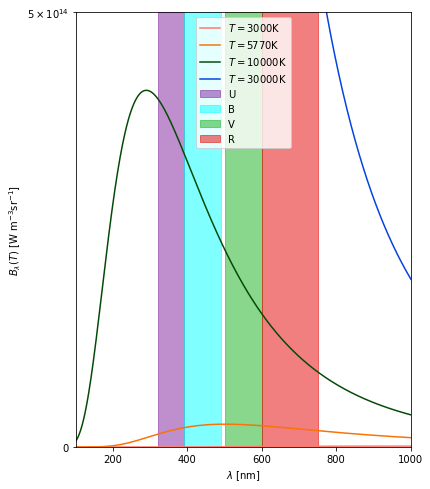

In [165]:
temps=np.array([3000, 5770, 10000, 30000])
u=[320e-9,390e-9]
b=[390e-9,490e-9]
v=[500e-9,600e-9]
r=[600e-9,750e-9]

frac_u=[]
frac_b=[]
frac_v=[]
frac_r=[]

for i in temps: frac_u.append(integrate.quad(planckiana, u[0], u[1], args=i))
frac_u= np.array([elemento[0] for elemento in frac_u])
frac_u=frac_u/total
for i in temps: frac_b.append(integrate.quad(planckiana, b[0], b[1], args=i))
frac_b= np.array([elemento[0] for elemento in frac_b])
frac_b=frac_b/total
for i in temps: frac_v.append(integrate.quad(planckiana, v[0], v[1], args=i))
frac_v= np.array([elemento[0] for elemento in frac_v])
frac_v=frac_v/total
for i in temps: frac_r.append(integrate.quad(planckiana, r[0], r[1], args=i))
frac_r= np.array([elemento[0] for elemento in frac_r])
frac_r=frac_r/total

g3=plt.figure(figsize=(6,8))
plt.plot(lam_int, planckiana(lam_int, 3000), color='xkcd:salmon', label=r'$T=3000$K')
plt.plot(lam_int, planckiana(lam_int, 5770), color='xkcd:orange', label=r'$T=5770$K')
plt.plot(lam_int, planckiana(lam_int, 10000), color='xkcd:darkgreen', label=r'$T=10000$K')
plt.plot(lam_int, planckiana(lam_int, 30000), color='xkcd:blue', label=r'$T=30000$K')
plt.xlim([100e-9, 1000e-9])
plt.ylim([0.001e8, 0.5e15])
plt.axvspan(u[0], u[1], color='xkcd:purple', alpha=0.5, label='U')
plt.axvspan(b[0], b[1], color='xkcd:cyan', alpha=0.5, label='B')
plt.axvspan(v[0], v[1], color='xkcd:green', alpha=0.5, label='V')
plt.axvspan(r[0], r[1], color='xkcd:red', alpha=0.5, label='R')
plt.ylabel(r"$B_\lambda(T)$ [W m$^{-3}$sr$^{-1}$]")
plt.xlabel(r"$\lambda$ [nm]")
plt.xticks([0.2e-6, 0.4e-6, 0.6e-6, 0.8e-6, 1e-6], ['200', '400', '600', '800', '1000'])
plt.yticks([0, 0.5e15], ['0',r'$5\times10^{14}$'])
plt.legend()



U captures the most energy for hot stars while R captures the most for cold stars. This relates to colors because U - R would be a good choice to have an idea about the temperature of each star. 